# 比較

- MacCormackスキーム
- Roeスキーム

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
nmax = 300
jmax = 101
dt = 0.002
gamma = 1.4

DIM = 3

In [12]:
xmin, xmax = -1.0, 1.0
xmid = 0.0
x = np.linspace(xmin, xmax, jmax)
dx = np.mean(np.diff(x))
dtdx = dt / dx

In [13]:
df1 = pd.read_csv("data/df_scheme1.csv")
df2 = pd.read_csv("data/df_scheme2.csv")

In [14]:
# グラフの設定
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.dpi"] = 100

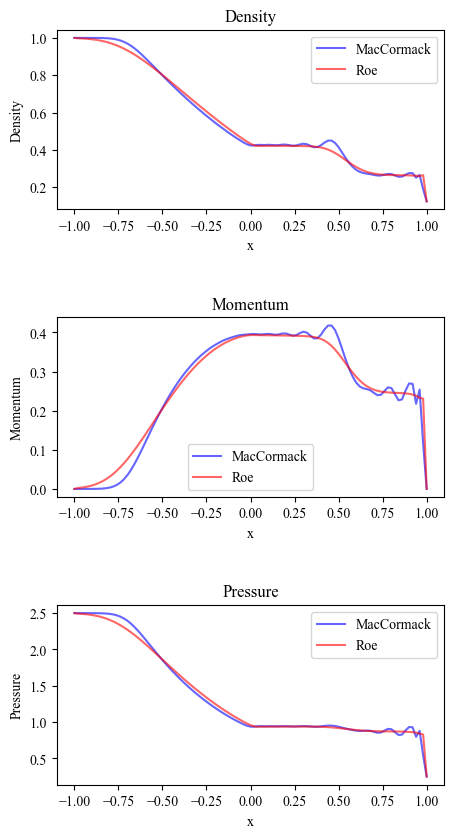

In [18]:
fig = plt.figure(figsize=(5, 10))
plt.subplots_adjust(wspace=0.4, hspace=.6)
axs = [fig.add_subplot(3, 1, i+1) for i in range(DIM)]

name_list = ["Density", "Momentum", "Pressure"]
column_list = ["Rho", "RhoU", "P"]
for i, ax in enumerate(axs):
    _column = column_list[i]
    ax.set_ylabel(name_list[i])
    ax.set_xlabel("x")
    ax.set_title(name_list[i])
    ax.plot(x, df1[_column], color="blue", label="{0}".format("MacCormack"), alpha=0.6)
    ax.plot(x, df2[_column], color="red", label="{0}".format("Roe"), alpha=0.6)
    ax.legend()

fig.savefig("img/report3/general_result.png")

# 考察

`report1.ipynb`と`report2.ipynb`で計算した値について併せて描画した。グラフは$n=300$の時、つまり$t=0.002 \times 300=0.6$秒の時の値である。
青色のラインがMacCormack法で計算したもの、赤色のラインがRoe法で計算したものである。

## 数値振動について

MacCormack法はRoe法と比べて数値振動が大きい。MacCormack法は数値流束を(1次精度風上法)+(修正項)に分解することができるが、この修正項は物理量が急激に変化するところで数値ノイズを引き起こす。一方で、1次精度TVD法は単調性を維持するように流速制限関数を導入することで、MacCormack法で見られるような数値振動を抑え込む。それが数値振動の様子の差にグラフに現れたと考えられる。